In [2]:
import os 
import sys #imports library for working with system commands
import pandas as pd  #Imports pandas for working with dataframes, with the abbreviation 'pd'
import matplotlib
import matplotlib.pyplot as plt  #Imports the major matplotlib library for making charts (pyplot) as 'plot'
import numpy as np #imports numpy, which has many math like commands, as 'np'
import sklearn as skl #imports scikitlearn, which is a machine learning library, as 'skl'
import seaborn as sns #imports advanced graphing library (seaborn) as 'sb'
import statsmodels.api as sm #imports a model for running functions for a number of statistical models and tests as 'sm'
import plotly.plotly as py #imports plotly
import plotly.graph_objs as go #imports plotly graph objects as 'go'
#Make matplotlib inline, to display the results of analysis on the screen.  This is a 'magic' command (passthrough)
%matplotlib inline
plt.style.use('seaborn-deep')

C:\Users\baxte\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


I am importing all the packages I will need.

In [3]:
os.chdir("C:\\Users\\baxte\\Google Drive\\Laptop Backup 3_16_2018\\Georgia Tech\\Spring 2018\\Comparative")

In [4]:
os.getcwd()

'C:\\Users\\baxte\\Google Drive\\Laptop Backup 3_16_2018\\Georgia Tech\\Spring 2018\\Comparative'

In [5]:
ChinaRice = pd.read_excel("nationaldatarice.xlsx") 
ChinaRice.name = 'ChinaRice'
ChinaWheat = pd.read_excel("nationaldatawheat.xlsx") 
ChinaWheat.name = 'ChinaWheat'

I'm reading in my two separate excel files.

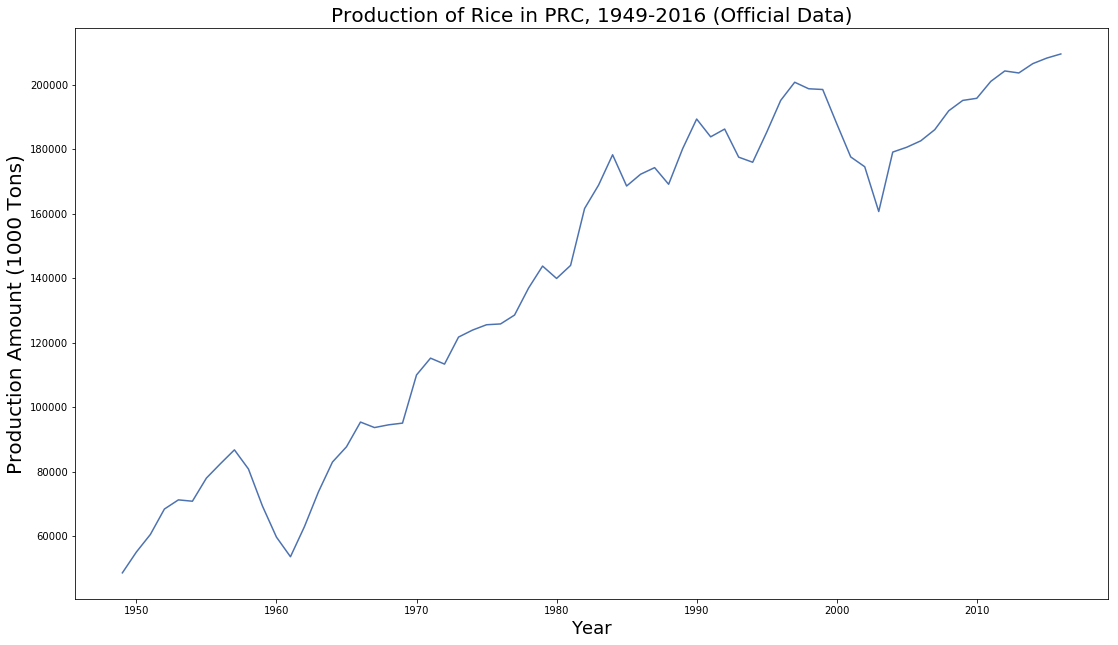

In [6]:
plt.plot(ChinaRice['Year_Desc'], ChinaRice['Amount'], label='Rice')
plt.title('Production of Rice in PRC, 1949-2016 (Official Data)', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Production Amount (1000 Tons)', fontsize=20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

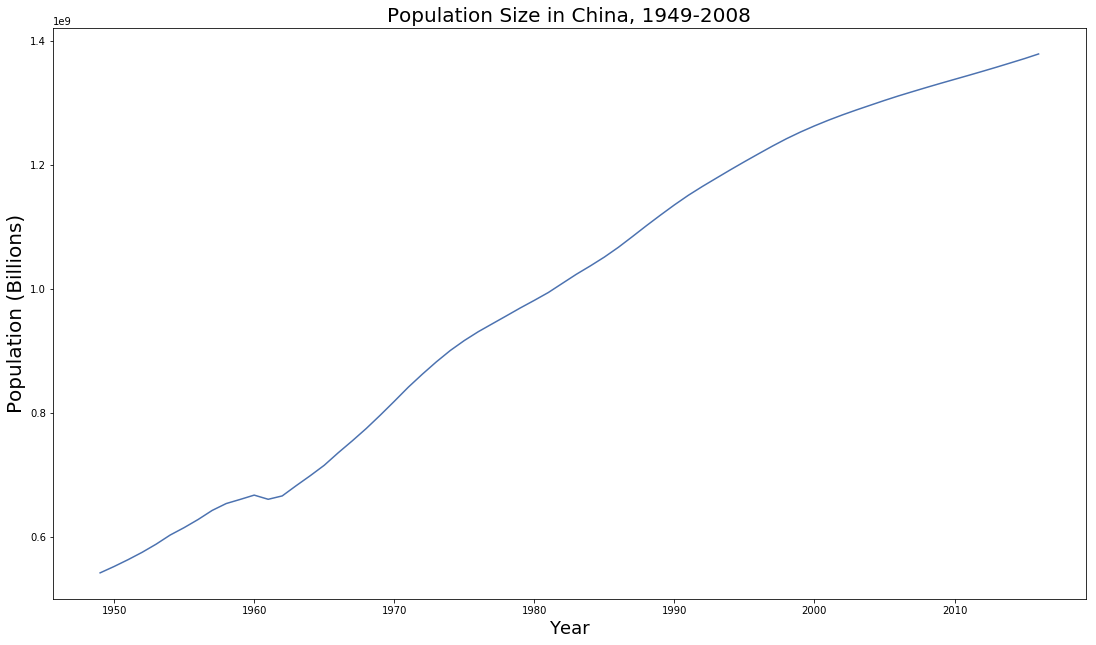

In [7]:
plt.plot(ChinaRice['Year_Desc'], ChinaRice['Population'], label='People')
plt.title('Population Size in China, 1949-2008', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Population (Billions)', fontsize=20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

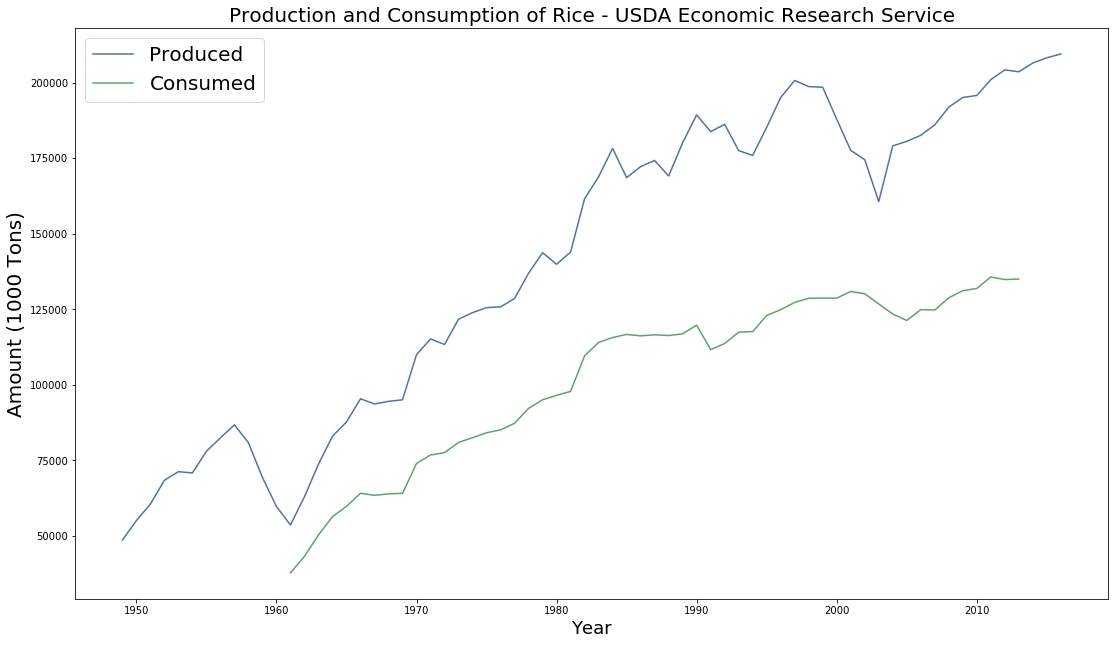

In [8]:
plt.plot(ChinaRice['Year_Desc'], ChinaRice['Amount'], label='Produced')
plt.plot(ChinaRice['Year_Desc'], ChinaRice['Consumption'], label='Consumed')
plt.legend(loc='upper left', prop={'size': 20})
plt.title('Production and Consumption of Rice - USDA Economic Research Service', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Amount (1000 Tons)', fontsize=20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

C:\Users\baxte\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\figure.py:402: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Amount   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     5646.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           2.03e-66
Time:                        17:59:13   Log-Likelihood:                -755.88
No. Observations:                  68   AIC:                             1514.
Df Residuals:                      67   BIC:                             1516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population     0.0001   1.93e-06     75.143      0.000       0.000       0.000
==============================================================================
Omnibus:                        1.539   Durbin-Watson:                   0.161
Prob(Omnibus):                  0.463   Jarque-Bera (JB):                1.295
Skew:                          -0.159   Prob(JB):                        0.523
Kurtosis:                       2.404   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

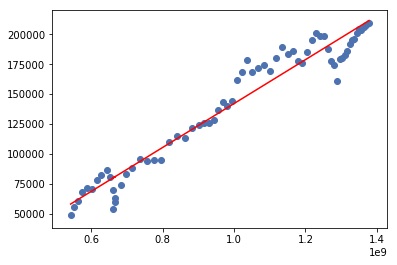

In [9]:
x = ChinaRice['Population']
y = ChinaRice['Amount']

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)

fig.show()

est = sm.OLS(y, x).fit()

est.summary()

The data wasn't making sense to me, so I found a full dataset from 1961 to 2013 from FAO (Food and Agriculture Organization of the United Nations) on China, looking at their domestic supply, production, and "available" food for their citizens.

In [10]:
ChinaRiceFAO = pd.read_excel("FAOStatsForMe.xlsx") 
ChinaRiceFAO.name = 'ChinaRiceFAO'

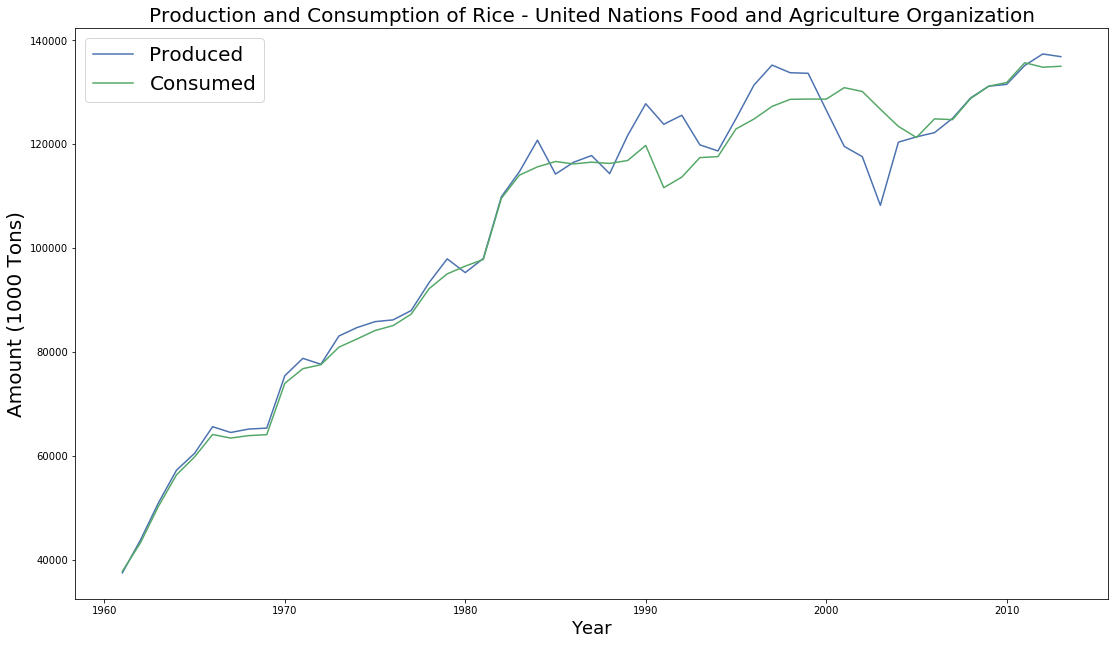

In [11]:
plt.plot(ChinaRiceFAO['Year'], ChinaRiceFAO['Production'], label='Produced')
plt.plot(ChinaRice['Year_Desc'], ChinaRice['Consumption'], label='Consumed')
plt.legend(loc='upper left', prop={'size': 20})
plt.title('Production and Consumption of Rice - United Nations Food and Agriculture Organization', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Amount (1000 Tons)', fontsize=20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

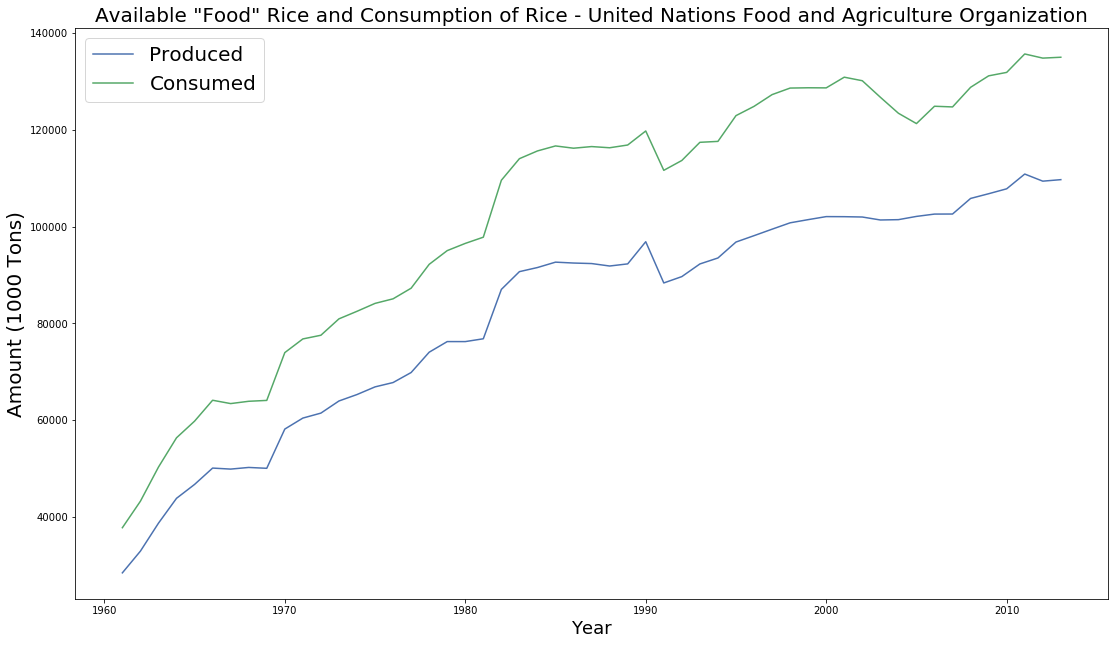

In [12]:
plt.plot(ChinaRiceFAO['Year'], ChinaRiceFAO['Food'], label='Produced')
plt.plot(ChinaRice['Year_Desc'], ChinaRice['Consumption'], label='Consumed')
plt.legend(loc='upper left', prop={'size': 20})
plt.title('Available "Food" Rice and Consumption of Rice - United Nations Food and Agriculture Organization', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Amount (1000 Tons)', fontsize=20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

C:\Users\baxte\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\figure.py:402: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Food   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     7269.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           1.51e-57
Time:                        17:59:14   Log-Likelihood:                -545.90
No. Observations:                  53   AIC:                             1094.
Df Residuals:                      52   BIC:                             1096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population  7.846e-05    9.2e-07     85.260      0.000    7.66e-05    8.03e-05
==============================================================================
Omnibus:                        8.963   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.242
Skew:                          -0.862   Prob(JB):                       0.0162
Kurtosis:                       3.871   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

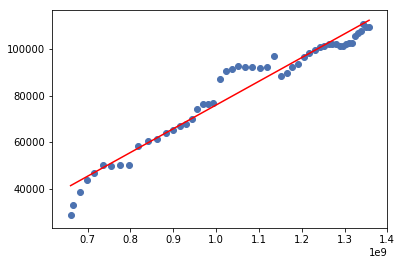

In [13]:
x = ChinaRiceFAO['Population']
y = ChinaRiceFAO['Food']

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)

fig.show()

est = sm.OLS(y, x).fit()

est.summary()

C:\Users\baxte\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\figure.py:402: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Food   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     991.1
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           1.56e-35
Time:                        17:59:14   Log-Likelihood:                -597.54
No. Observations:                  53   AIC:                             1197.
Df Residuals:                      52   BIC:                             1199.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
UrbanPercent  2748.9217     87.319     31.481      0.000    2573.703    2924.140
==============================================================================
Omnibus:                        4.749   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                3.746
Skew:                          -0.531   Prob(JB):                        0.154
Kurtosis:                       2.245   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

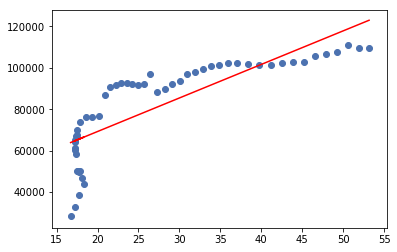

In [14]:
x = ChinaRiceFAO['UrbanPercent']
y = ChinaRiceFAO['Food']

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)

fig.show()

est = sm.OLS(y, x).fit()

est.summary()

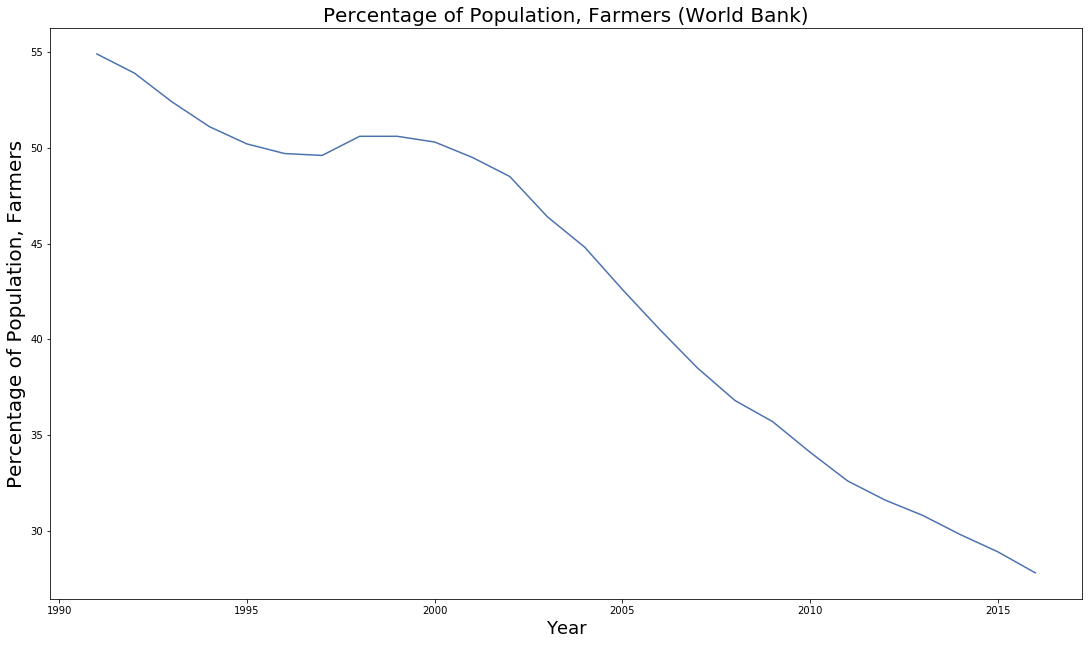

In [15]:
plt.plot(ChinaRice['Year_Desc'], ChinaRice['FarmerPop'])
plt.title('Percentage of Population, Farmers (World Bank)', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Percentage of Population, Farmers', fontsize=20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

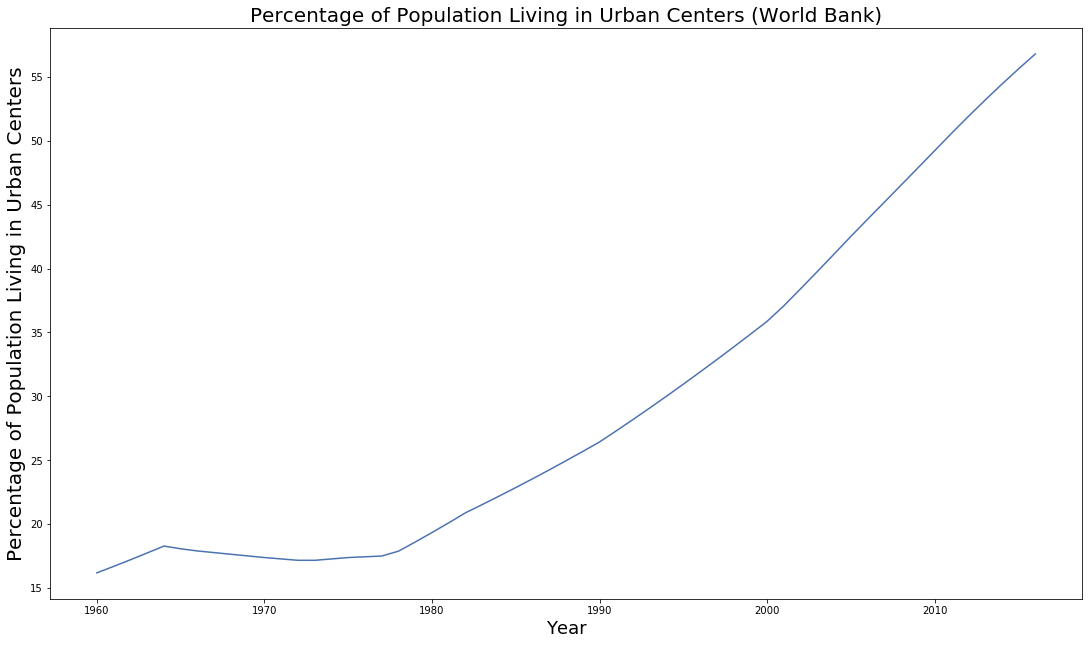

In [16]:
plt.plot(ChinaRice['Year_Desc'], ChinaRice['UrbanPop'])
plt.title('Percentage of Population Living in Urban Centers (World Bank)', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Percentage of Population Living in Urban Centers', fontsize=20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

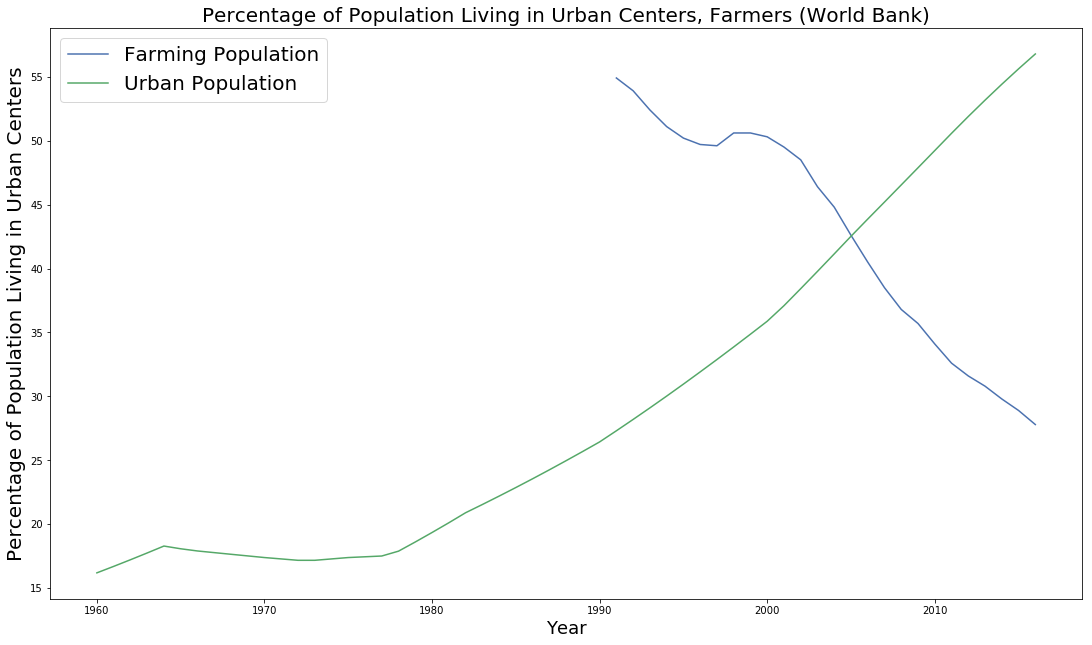

In [17]:
plt.plot(ChinaRice['Year_Desc'], ChinaRice['FarmerPop'], label='Farming Population')
plt.plot(ChinaRice['Year_Desc'], ChinaRice['UrbanPop'], label='Urban Population')
plt.legend(loc='upper left', prop={'size': 20})
plt.title('Percentage of Population Living in Urban Centers, Farmers (World Bank)', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Percentage of Population Living in Urban Centers', fontsize=20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [18]:
ChinaRice.describe()

,Year_Desc,Amount,Population,Consumption,UrbanPop,FarmerPop
count,68.00000,68.000000,6.800000e+01,53.000000,57.000000,26.000000
mean,1982.50000,141314.977353,9.958209e+08,103325.259434,29.323842,42.776923
std,19.77372,51372.115425,2.717882e+08,27655.082009,12.741359,8.940126
min,1949.00000,48645.000000,5.416700e+08,37790.110000,16.203000,27.799999
25%,1965.75000,92193.750000,7.303462e+08,82515.350000,17.785000,34.499999
50%,1982.50000,161125.500000,1.015970e+09,116223.960000,24.974000,45.600000
75%,1999.25000,185428.000000,1.255212e+09,124895.420000,38.425000,50.275000
max,2016.00000,209503.000000,1.378665e+09,135701.020000,56.778000,54.900002


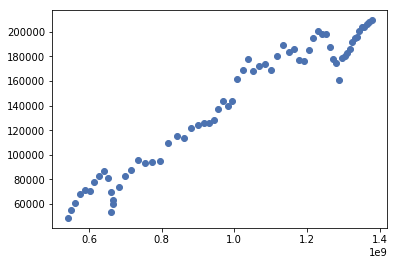

In [19]:
plt.scatter(data=ChinaRice, x='Population', y='Amount')

In [20]:
ChinaRice.corr()

,Year_Desc,Amount,Population,Consumption,UrbanPop,FarmerPop
Year_Desc,1.000000,0.952803,0.993685,0.940859,0.946454,-0.971646
Amount,0.952803,1.000000,0.971362,0.984952,0.774712,-0.622561
Population,0.993685,0.971362,1.000000,0.968816,0.891352,-0.933628
Consumption,0.940859,0.984952,0.968816,1.000000,0.789914,-0.695168
UrbanPop,0.946454,0.774712,0.891352,0.789914,1.000000,-0.983598
FarmerPop,-0.971646,-0.622561,-0.933628,-0.695168,-0.983598,1.000000


In [21]:
X = ChinaRice['Population']
Y = ChinaRice['Amount']

results = sm.OLS(Y,sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Amount   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1103.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           6.45e-43
Time:                        17:59:15   Log-Likelihood:                -735.84
No. Observations:                  68   AIC:                             1476.
Df Residuals:                      66   BIC:                             1480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.152e+04   5703.519     -7.280      0.000   -5.29e+04   -3.01e+04
Population     0.0002   5.53e-06     33.212      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.656   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.721   Jarque-Bera (JB):                0.264
Skew:                          -0.131   Prob(JB):                        0.876
Kurtosis:                       3.159   Cond. No.                     3.95e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In order to make this more readable, I am changing population to 1 Unit equal to 1 Billion.

In [22]:
ChinaRice['PopMillions'] = ChinaRice['Population']/1000000

In [23]:
ChinaRice.describe()

,Year_Desc,Amount,Population,Consumption,UrbanPop,FarmerPop,PopMillions
count,68.00000,68.000000,6.800000e+01,53.000000,57.000000,26.000000,68.000000
mean,1982.50000,141314.977353,9.958209e+08,103325.259434,29.323842,42.776923,995.820882
std,19.77372,51372.115425,2.717882e+08,27655.082009,12.741359,8.940126,271.788232
min,1949.00000,48645.000000,5.416700e+08,37790.110000,16.203000,27.799999,541.670000
25%,1965.75000,92193.750000,7.303462e+08,82515.350000,17.785000,34.499999,730.346250
50%,1982.50000,161125.500000,1.015970e+09,116223.960000,24.974000,45.600000,1015.970000
75%,1999.25000,185428.000000,1.255212e+09,124895.420000,38.425000,50.275000,1255.212500
max,2016.00000,209503.000000,1.378665e+09,135701.020000,56.778000,54.900002,1378.665000


In [24]:
X = ChinaRice['PopMillions']
Y = ChinaRice['Amount']

results = sm.OLS(Y,sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Amount   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1103.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           6.45e-43
Time:                        17:59:15   Log-Likelihood:                -735.84
No. Observations:                  68   AIC:                             1476.
Df Residuals:                      66   BIC:                             1480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.152e+04   5703.519     -7.280      0.000   -5.29e+04   -3.01e+04
PopMillions   183.6021      5.528     33.212      0.000     172.565     194.640
==============================================================================
Omnibus:                        0.656   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.721   Jarque-Bera (JB):                0.264
Skew:                          -0.131   Prob(JB):                        0.876
Kurtosis:                       3.159   Cond. No.                     3.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

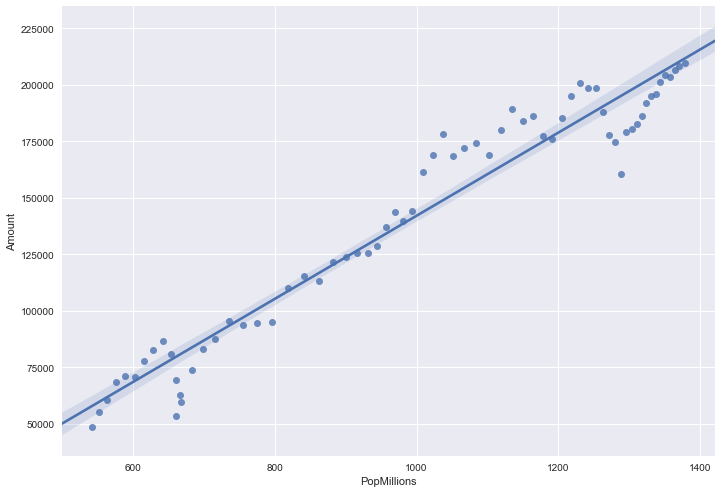

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.regplot(x="PopMillions", y="Amount", data=ChinaRice, label='Regression')

In [26]:
ChinaRiceFormatted = pd.read_excel("nationaldatachinarice.xlsx") 
ChinaRiceFormatted.name = 'ChinaRiceFormatted'

In [27]:
X = ChinaRiceFormatted['Consumption']
Y = ChinaRiceFormatted['Amount']

results = sm.OLS(Y,sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Amount   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1656.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           1.48e-40
Time:                        17:59:16   Log-Likelihood:                -545.80
No. Observations:                  53   AIC:                             1096.
Df Residuals:                      51   BIC:                             1100.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -518.0142   3923.521     -0.132      0.895   -8394.812    7358.784
Consumption     1.4938      0.037     40.699      0.000       1.420       1.568
==============================================================================
Omnibus:                       22.116   Durbin-Watson:                   0.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.862
Skew:                          -1.053   Prob(JB):                     1.65e-13
Kurtosis:                       7.714   Cond. No.                     4.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
IndiaRice = pd.read_excel("nationaldataindiarice.xlsx") 
IndiaRice.name = 'IndiaRice'

Data on Indian Rice production, consumption, and population to compare with China.

In [29]:
IndiaRice['PopMillions'] = IndiaRice['Population']/1000000

In [30]:
X = IndiaRice['PopMillions']
Y = IndiaRice['Amount']
results = sm.OLS(Y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Amount   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1071.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           6.69e-36
Time:                        17:59:16   Log-Likelihood:                -525.23
No. Observations:                  53   AIC:                             1054.
Df Residuals:                      51   BIC:                             1058.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8203.3703   2356.249     -3.482      0.001   -1.29e+04   -3473.004
PopMillions    88.3779      2.701     32.724      0.000      82.956      93.800
==============================================================================
Omnibus:                       10.675   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.380
Skew:                          -0.983   Prob(JB):                      0.00557
Kurtosis:                       3.913   Cond. No.                     3.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

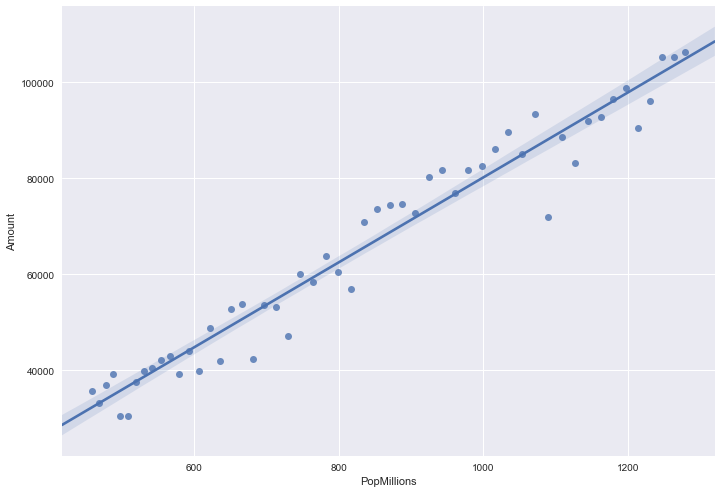

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.regplot(x="PopMillions", y="Amount", data=IndiaRice, label='Regression')

In [32]:
X = IndiaRice['Consumption']
Y = IndiaRice['Amount']
results = sm.OLS(Y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Amount   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     2024.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           1.02e-42
Time:                        17:59:16   Log-Likelihood:                -508.94
No. Observations:                  53   AIC:                             1022.
Df Residuals:                      51   BIC:                             1026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5296.5796   1653.777     -3.203      0.002   -8616.676   -1976.483
Consumption     1.1069      0.025     44.988      0.000       1.058       1.156
==============================================================================
Omnibus:                        6.886   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.361
Skew:                          -0.595   Prob(JB):                       0.0416
Kurtosis:                       4.211   Cond. No.                     2.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
VietnamRice = pd.read_excel("nationaldatavietnamrice.xlsx") 
VietnamRice.name = 'VietnamRice'

Data on Vietnamese rice production, consumption and population to compare with China.

In [34]:
VietnamRice['PopMillions'] = VietnamRice['Population']/1000000

In [35]:
X = VietnamRice['PopMillions']
Y = VietnamRice['Amount']
results = sm.OLS(Y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Amount   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     624.8
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           2.78e-30
Time:                        17:59:16   Log-Likelihood:                -480.77
No. Observations:                  53   AIC:                             965.5
Df Residuals:                      51   BIC:                             969.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.301e+04   1120.069    -11.612      0.000   -1.53e+04   -1.08e+04
PopMillions   434.5096     17.383     24.996      0.000     399.612     469.407
==============================================================================
Omnibus:                        9.957   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                2.920
Skew:                           0.098   Prob(JB):                        0.232
Kurtosis:                       1.867   Cond. No.                         245.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

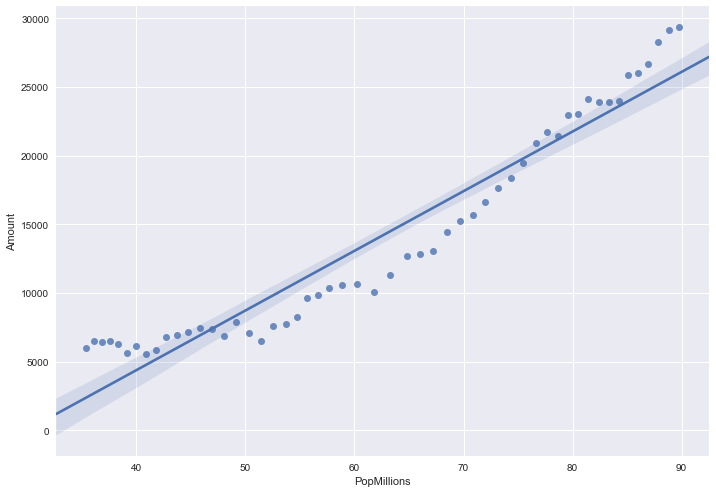

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.regplot(x="PopMillions", y="Amount", data=VietnamRice, label='Regression')

I forgot about the vietnam war. This explains the decrease in productivity, and also the decrease in population.

In [37]:
IndonesiaRice = pd.read_excel("nationaldataindonesiarice.xlsx") 
IndonesiaRice.name = 'IndonesiaRice'

Let's try Indonesian data instead.

In [38]:
IndonesiaRice['PopMillions'] = IndonesiaRice['Population']/1000000

In [39]:
X = IndonesiaRice['PopMillions']
Y = IndonesiaRice['Amount']
results = sm.OLS(Y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Amount   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     2866.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           1.72e-46
Time:                        17:59:16   Log-Likelihood:                -463.67
No. Observations:                  53   AIC:                             931.3
Df Residuals:                      51   BIC:                             935.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.451e+04    777.802    -18.651      0.000   -1.61e+04   -1.29e+04
PopMillions   235.1915      4.393     53.535      0.000     226.372     244.011
==============================================================================
Omnibus:                        4.626   Durbin-Watson:                   0.387
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                2.192
Skew:                          -0.181   Prob(JB):                        0.334
Kurtosis:                       2.072   Cond. No.                         645.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

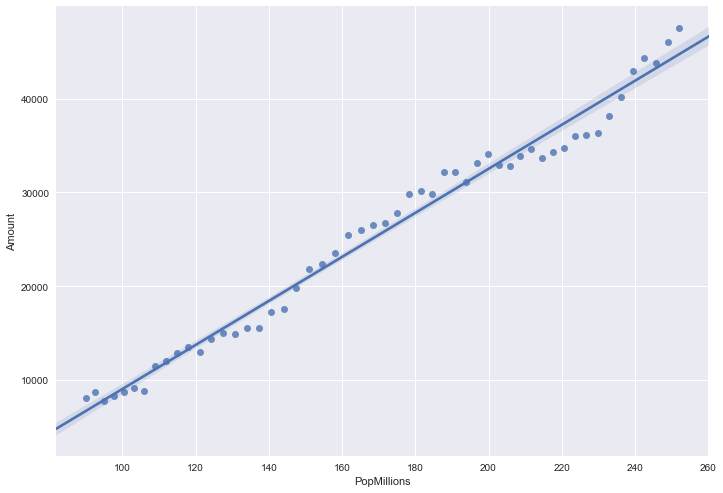

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.regplot(x="PopMillions", y="Amount", data=IndonesiaRice, label='Regression')

In [41]:
X = IndonesiaRice['Consumption']
Y = IndonesiaRice['Amount']
results = sm.OLS(Y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Amount   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     5974.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           1.59e-54
Time:                        17:59:17   Log-Likelihood:                -444.45
No. Observations:                  53   AIC:                             892.9
Df Residuals:                      51   BIC:                             896.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -634.1711    369.722     -1.715      0.092   -1376.419     108.077
Consumption     0.9971      0.013     77.291      0.000       0.971       1.023
==============================================================================
Omnibus:                       14.558   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.960
Skew:                          -0.978   Prob(JB):                     7.64e-05
Kurtosis:                       5.181   Cond. No.                     7.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
PriceCompare = pd.read_excel("RICEEXPORTS.xlsx") 
PriceCompare.name = 'PriceCompare'

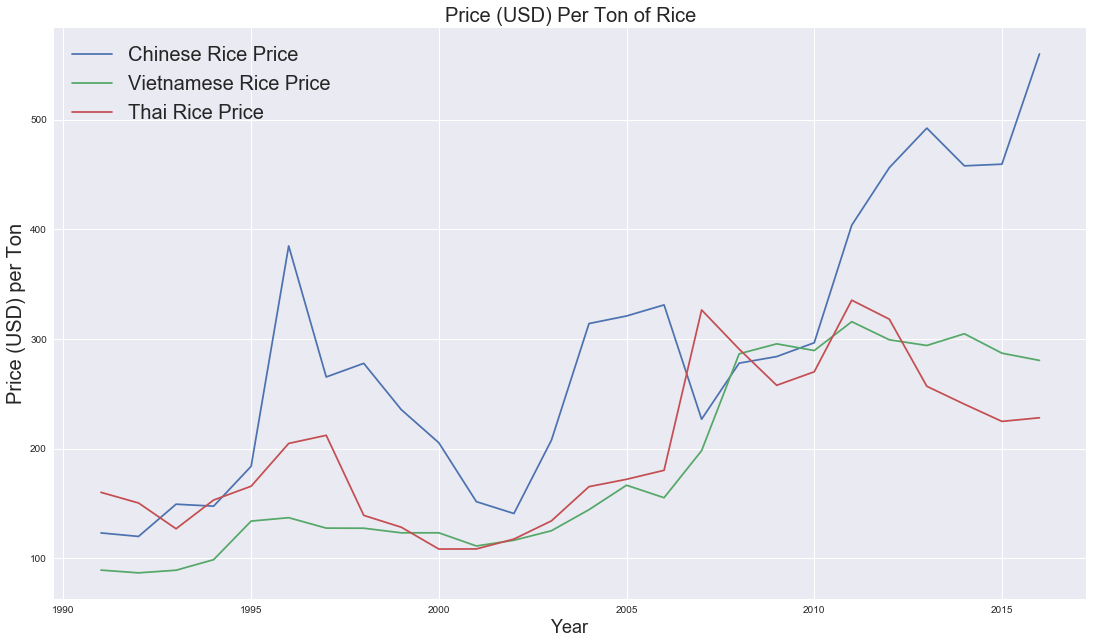

In [56]:
plt.plot(PriceCompare['Year'], PriceCompare['China'], label='Chinese Rice Price')
plt.plot(PriceCompare['Year'], PriceCompare['Vietnam'], label='Vietnamese Rice Price')
plt.plot(PriceCompare['Year'], PriceCompare['Thailand'], label='Thai Rice Price')


plt.legend(loc='upper left', prop={'size': 20})
plt.title('Price (USD) Per Ton of Rice', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Price (USD) per Ton', fontsize=20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()